### 과대적합, 과소적합, 일반화
1. 과대적합(Overfitting) : train set에 너무 맞추어져 있어 test set에서 성능 저하
    - 학습데이터는 잘 맞추나, 평가데이터에 대해서는 못 맞춤
    - 규칙이 너무 많거나, 특정 대상에게만 규칙을 찾은 경우 발생
2. 과소적합(Underfitting) : train set, test set에서 성능 저하
    - 학습데이터도 못 맞추고, 평가 데이터에 대해서도 못 맞춤
    - 규칙을 찾음에 있어서 너무 못 찾음
3. 일반화(Generalization) : train set으로 적당히 학습한 모델이 test set에 대해서 정확히 예측하는 현상
    - 학습데이터도 어느정도 맞추고, 평가 데이터에 대해서도 어느정도 맞춤
    - 적절한 패턴을 찾음
4. 일반화 성능을 최대화하는 모델을 찾는 것이 목표

### KNN(K Nearest Neighbors) 알고리즘
- 새로운 데이터 포인트를 예측할 때, 가장 가까운 데이터셋의 데이터포인트(관측자)를 찾아 예층 수행
- 다수결의 원칙
- k 값 -> 가까운 이웃의 수를 의미
- 분류, 회귀 가능

### 1. 문제 정의
- 150개의 꽃잎 높이/너비, 꽃받침 길이/너비 데이터를 통해서 붓꽃의 품종을 판별하는 모델 생성
- 분류 모델 사용.

In [67]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

# 머신러닝 도구
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 필요한 데이터셋이 저장되어 있는 라이브러리
from sklearn.datasets import load_iris # iris 데이터셋 불러오기

### 2. 데이터 수집
- sklearn에서 제공하는 iris 데이터셋 사용

In [68]:
# iris 데이터 열어서 확인
iris_data = load_iris()
iris_data

# 번치(다발) 객체 : 머신러닝 데이터셋 구조

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [69]:
# key값만 확인
iris_data.keys()

# data : X값(문제데이터, 독립변수, 설명변수, 특성, feature)
iris_data.data

# target : y값(정답데이터, 종속변수, 반응변수, label, 라벨)
iris_data['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [70]:
# feature_names : 특성의 이름들
# target_names : 답데이터 이름들
# DESCR : 기술 통계량, 데이터 정보(크기, 상관관계, 출처 등) decribe의 약자

In [71]:
# 문제 데이터 살펴보기

# 크기 확인
iris_data['data'].shape # 150행, 4열

# 데이터 타입 확인
iris_data['data'].dtype # 문제 데이터는 항상 데이터타입이 수치형이어야 한다!

# 차원 타입 -> ndim
iris_data['data'].ndim

2

In [72]:
# 문제 데이터(특성)의 이름 확인
iris_data['feature_names']
# ['sepal length (cm)', # 꽃받침 길이
#  'sepal width (cm)', # 꽃받침 너비
#  'petal length (cm)', # 꽃잎 길이
#  'petal width (cm)'] # 꽃잎 너비

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [73]:
iris_data['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [74]:
# 정답 데이터 살펴보기
# 정답 데이터 클래스(카테고리) 종류 : 3개 (0,1,2)
iris_data['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [75]:
# 정답 데이터 이름 확인하기
iris_data['target_names']
# 'setosa' == 0, 'versicolor' ==1, 'virginica' == 2

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [76]:
# 데이터 기술통계량 확인
print(iris_data['DESCR'])

# Class Correlation : 클래스와의 상관관계
# -1 ~ 1 표현되는 상관계수
# -1과 +1에 가까울수록 상관이 어느정도 높음(관계가 깊다)
# 0에 가까울수록 상대적으로 상관관계가 덜함(적음) (관계가 얕다, 비교적 관계가 없다)
# petal length, petal width 2개 컬럼이 3가지 붓꽃 품종을 분류하는데 도움을 주고 있다!
# (유의미한 컬럼이다!)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

### 3. 데이터 전처리
- sklearn에서 제공되는 데이터셋은 정제되어 있음(별도로 전처리가 필요하지는 않음)

### 데이터 분리
- numpy라이브러리 사용 -> 특성 데이터(문제 데이터)만 DataFrame (2차원) 변경
- X, y 로 분리
- train_test_split 도구를 활용해서 train set과 test set 구성

In [77]:
# iris 데이터 DataFrame(2차원) 으로 만들어주기
iris_data['data']
iris_df = pd.DataFrame(iris_data['data'], columns=iris_data['feature_names'])
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [78]:
# 문제(X)와 답(y) 변수 정리
X = iris_df
y = iris_data['target']
y

# 데이터의 균형 확인 -> 다양성이 보장 되어야 높은 정확도의 모델을 만들 수 있기 때문
# np.unique() : 중복없이 값을 확인하는 함수
# return_counts = True : 각각의 카테고리가 몇 개씩인지 알려줌
np.unique(y, return_counts=True)

(array([0, 1, 2]), array([50, 50, 50]))

In [79]:
# train, test 분리 도구 불러오기
from sklearn.model_selection import train_test_split

In [80]:
#train_test_split(문제, 답, 테스트데이터 비율)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [81]:
#train_test_split(문제, 답, 테스트데이터 비율)
#알아서 훈련용, 테스트 용으로 나누어주는 도구
#랜덤하게 섞고 분리(랜덤 샘플링)

#7:3(train 70%, test 30%)
#test_size = 0.3

#random_state = 5(랜덤하게 섞는 기준을 고정하는 장치)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 5)

In [82]:
# 4개 변수 크기 확인
# shape
print("훈련 데이터셋 크기 : ", X_train.shape, y_train.shape)
print("테스트 데이터셋 크기 : ", X_test.shape, y_test.shape)
      

훈련 데이터셋 크기 :  (105, 4) (105,)
테스트 데이터셋 크기 :  (45, 4) (45,)


In [83]:
# 데이터의 다양성 유지되고 있는지 확인
# y_train 의 카테고리별 개수 확인

# 훈련데이터의 답 데이터를 가지고 편향 확인
np.unique(y_train, return_counts=True)[1]/105
# 나름대로 다양성이 유지가 되고 있음을 확인

array([0.33333333, 0.32380952, 0.34285714])

### 4. 탐색적 데이터 분석(EDA)
- 머신러닝에서 사용하는 모든 데이터셋에 DESCR 이라는 컬럼 존재하는 것은 아님
- 우리 나름대로 데이터를 탐색할 수 있는 방법 알아보자!
- 산점도 행렬(scatterplot matrix) : 한꺼번에 특성 간의 관계를 알아보기 가능
- 각 특성을 결합하여 3가지 봇꽃 품종이 잘 분리가 되는 특성이 있는지 확인해보자!

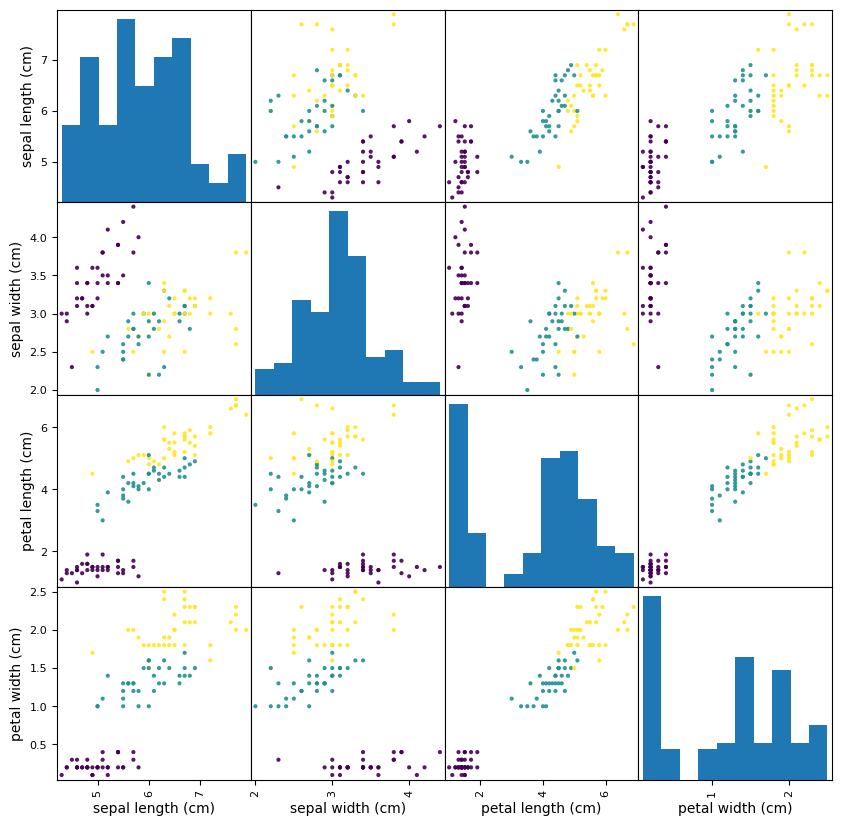

In [84]:
# 특성 간 상관관계 시각화하여 확인
pd.plotting.scatter_matrix(X_train, # 문제 데이터 -> 좌표
                          figsize = (10,10), # 그래프 크기
                          c = y_train, # 클래스별 색상 설정
                          alpha = 0.9) # 그래프 산점도 점 투명도
plt.show() # 시각화

# 같은 색상의 점끼리 뭉쳐있고, 다른 색상과는 위치적으로 분리 되어있다면
# 해당 특성의 결합이 붓꽃 품종을 분류하는데 있어 의미가 있는 것이다!
# 꽃잎의 길이와 너비가 붓꽃 품종을 분류하는 데 의미가 있다!

### 5. 모델링

In [85]:
# 모델 객체 생성
# knn 분류 모델
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


### 6. 모델학습

In [86]:
# 모델 학습
# 모델명.fit(훈련문제, 훈련답)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [87]:
# 모델 예측
# 모델명.predict(테스트문제)
pre = knn_model.predict(X_test)
pre  # 문제를 풀고 답을 쓴 상태

array([1, 2, 2, 0, 2, 1, 0, 2, 0, 1, 1, 2, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2,
       0, 2, 1, 2, 1, 1, 1, 2, 0, 1, 1, 0, 1, 0, 0, 2, 0, 2, 2, 1, 0, 0,
       1])

### 7. 모델 평가

In [88]:
accuracy_score(y_test, pre)

0.9555555555555556


### 하이퍼 파라미터 튜닝(조정)
- knn에서는 이웃의 수(k,n_neighbors) 값을 의미

In [101]:
# k = 10
knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(X_train, y_train)
pre = knn_model.predict(X_test)
accuracy_score(y_test, pre)

0.9777777777777777